<a href="https://colab.research.google.com/github/manjulamishra/DS-Sprint-02-Storytelling-With-Data/blob/master/Copy_of_LS_DS_122_Choose_appropriate_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_
# Choose appropriate visualizations

# Upgrade Seaborn

Make sure you have at least version 0.9.0

In [2]:
!pip install --upgrade seaborn

    100% |████████████████████████████████| 215kB 21.6MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [3]:
import seaborn as sns
sns.__version__

'0.7.1'

# Fix misleading visualizations

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [21]:
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Sprint-02-Storytelling-With-Data/master/module2-choose-appropriate-visualizations/misleading.py
    
import misleading

--2018-11-13 22:27:14--  https://raw.githubusercontent.com/LambdaSchool/DS-Sprint-02-Storytelling-With-Data/master/module2-choose-appropriate-visualizations/misleading.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1641 (1.6K) [text/plain]
Saving to: ‘misleading.py’

misleading.py       100%[===================>]   1.60K  --.-KB/s    in 0s      

2018-11-13 22:27:14 (138 MB/s) - ‘misleading.py’ saved [1641/1641]



#### Fix misleading plot #1

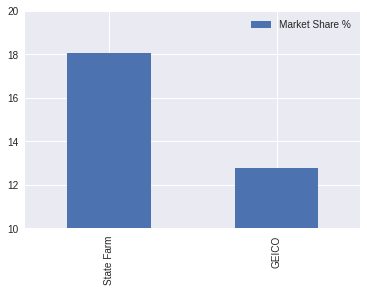

In [22]:
misleading.plot1()

#### Fix misleading plot #2

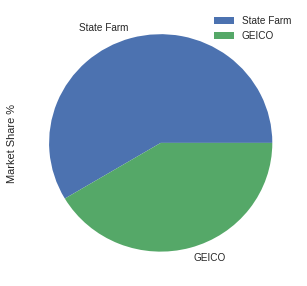

In [23]:
misleading.plot2()

#### Fix misleading plot #3

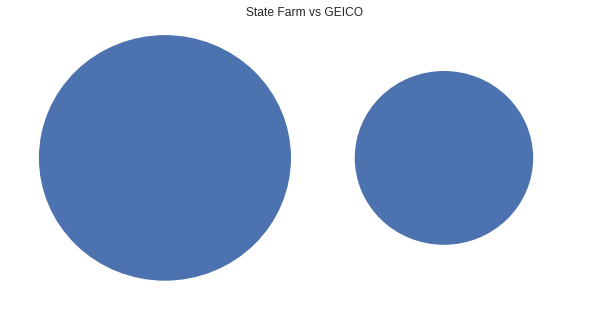

In [24]:
misleading.plot3()

#### Fix misleading plot #4

_If you're on Jupyter (not Colab) then uncomment and run this cell below:_

In [0]:
# import altair as alt
# alt.renderers.enable('notebook')

In [26]:
misleading.plot4()

Chart({
  data: UrlData({
    format: TopoDataFormat({
      feature: 'states',
      type: 'topojson'
    }),
    url: 'https://vega.github.io/vega-datasets/data/us-10m.json'
  }),
  encoding: EncodingWithFacet({
    color: Color({
      shorthand: 'State Farm policy premiums',
      type: 'quantitative'
    })
  }),
  height: 300,
  mark: 'geoshape',
  projection: Projection({
    type: 'albersUsa'
  }),
  transform: [LookupTransform({
    from: LookupData({
      data:                    state  id  State Farm policy premiums  \
      0                Alabama   1                      768213   
      1                 Alaska   2                      128613   
      2                Arizona   4                      760003   
      3               Arkansas   5                      454931   
      4             California   6                     3655463   
      5               Colorado   8                      827143   
      6            Connecticut   9                      169773   
      7               Delaware  10                      191319   
      8   District of Columbia  11                       67231   
      9                Florida  12                     2806322   
      10               Georgia  13                     1761224   
      11                Hawaii  15                      133498   
      12                 Idaho  16                      130613   
      13              Illinois  17                     2256543   
      14               Indiana  18                      861382   
      15                  Iowa  19                      368898   
      16                Kansas  20                      351343   
      17              Kentucky  21                      680433   
      18             Louisiana  22                     1415980   
      19                 Maine  23                      101111   
      20              Maryland  24                      883401   
      21         Massachusetts  25                           0   
      22              Michigan  26                     1580398   
      23             Minnesota  27                      851940   
      24           Mississippi  28                      467887   
      25              Missouri  29                      883774   
      26               Montana  30                      156816   
      27              Nebraska  31                      273727   
      28                Nevada  32                      404688   
      29         New Hampshire  33                      103340   
      30            New Jersey  34                      619623   
      31            New Mexico  35                      261922   
      32              New York  36                     1666653   
      33        North Carolina  37                      842368   
      34          North Dakota  38                       67282   
      35                  Ohio  39                     1240075   
      36              Oklahoma  40                      636063   
      37                Oregon  41                      564416   
      38          Pennsylvania  42                     1654528   
      39          Rhode Island  44                           0   
      40        South Carolina  45                      874436   
      41          South Dakota  46                      101912   
      42             Tennessee  47                      889329   
      43                 Texas  48                     3395165   
      44                  Utah  49                      300403   
      45               Vermont  50                       30003   
      46              Virginia  51                      878312   
      47            Washington  53                      794882   
      48         West Virginia  54                      323608   
      49             Wisconsin  55                      443680   
      50               Wyoming  56                       90412   
      51           Puerto Rico  72                           0   
      
          BERKSHIRE HATH

#### Links
- [How to Spot Visualization Lies](https://flowingdata.com/2017/02/09/how-to-spot-visualization-lies/)
- [Where to Start and End Your Y-Axis Scale](http://stephanieevergreen.com/y-axis/)
- [xkcd heatmap](https://xkcd.com/1138/)
- [Surprise Maps: Showing the Unexpected](https://medium.com/@uwdata/surprise-maps-showing-the-unexpected-e92b67398865)

# Use Seaborn to visualize distributions and relationships with continuous and discrete variables

#### Links
- [Seaborn tutorial](https://seaborn.pydata.org/tutorial.html)
- [Seaborn example gallery](https://seaborn.pydata.org/examples/index.html)
- [Chart Chooser](https://extremepresentation.typepad.com/files/choosing-a-good-chart-09.pdf)

## 1. Anscombe dataset

### Load dataset

In [0]:
df = sns.load_dataset('anscombe')

### See the data's shape

In [41]:
df.shape

(44, 3)

### See the data

In [29]:
df

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


### [Group by](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) `'dataset'`

In [0]:
groups = df.groupby('dataset')
#b = df.groupby('y').size()


In [43]:
groups.describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

### [Describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) the groups

In [10]:
df

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


### Get the [count](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html), for each column in each group

In [44]:
df.count()
groups.count()

,x,y
dataset,,
I,11,11
II,11,11
III,11,11
IV,11,11


### Get the [mean](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html) ...

In [45]:
groups.mean()

,x,y
dataset,,
I,9.0,7.500909
II,9.0,7.500909
III,9.0,7.500000
IV,9.0,7.500909


### Get the [standard deviation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.std.html) ...

In [46]:
groups.std()

,x,y
dataset,,
I,3.316625,2.031568
II,3.316625,2.031657
III,3.316625,2.030424
IV,3.316625,2.030579


### Get the [correlation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) ...

In [47]:
groups.corr()

x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000

### Use pandas to [plot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) the groups, as scatter plots

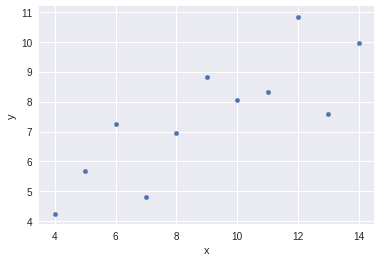

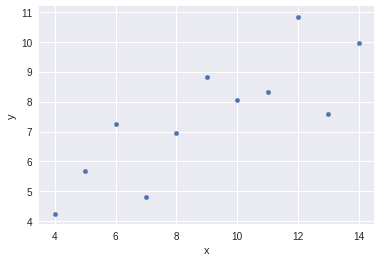

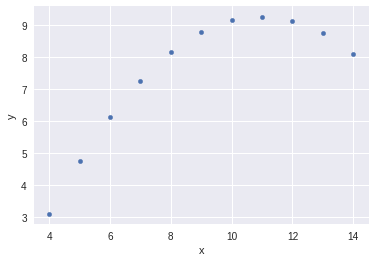

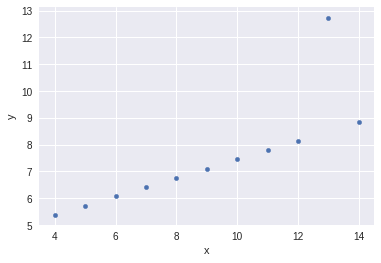

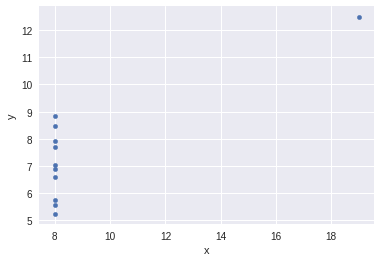

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
# plt.scatter
#groups.plot(x ='x', y = 'y', kind = "scatter") #same as the one below
groups.plot.scatter(x ='x', y = 'y'); #semi colon doesn't give axis details

### Use Seaborn to make [relational plots](http://seaborn.pydata.org/generated/seaborn.relplot.html)

In [39]:
import seaborn as sns
sns.relplot('x', 'y', col="dataset", data=df);

AttributeError: ignored

In [49]:
%matplotlib inline
import seaborn as sns
assert sns.__version__ == '0.9.0'


df = sns.load_dataset('anscombe')
sns.relplot('x', 'y', col='dataset', data=df);

AssertionError: ignored

In [50]:
%matplotlib inline
import seaborn as sns
assert sns.__version__ == '0.9.0'

df = sns.load_dataset('anscombe')
sns.relplot('x', 'y', col = 'dataset', hue = 'dataset', col_wrap=2, data=df);

AssertionError: ignored

In [1]:
sns.__version__

NameError: ignored

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Use Seaborn to make [linear model plots](http://seaborn.pydata.org/generated/seaborn.lmplot.html)

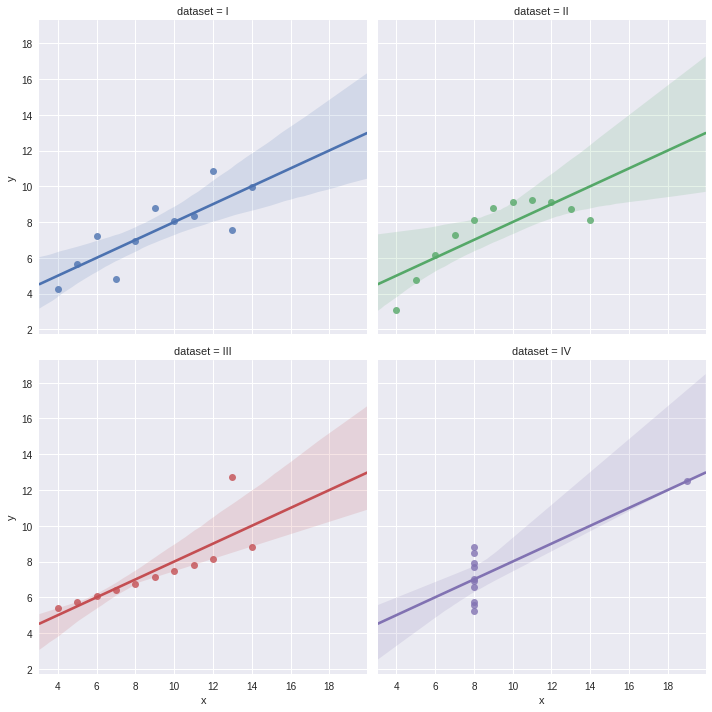

In [52]:
#relational vs linear model plot
#sns.relplot('x', 'y', col = 'dataset', hue = 'dataset', col_wrap=2, data=df);
sns.lmplot('x', 'y', col = 'dataset', hue = 'dataset', col_wrap=2, data=df);

shading is condifnece interval

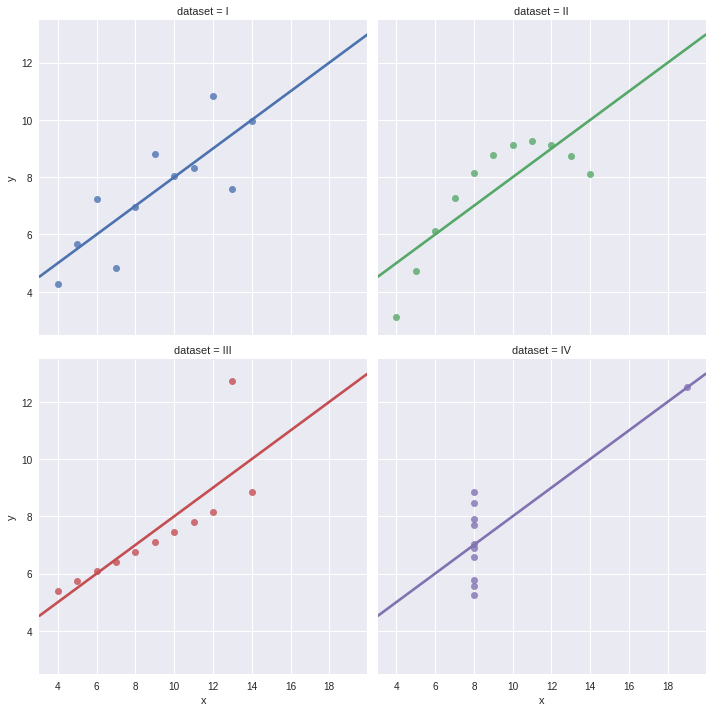

In [53]:
sns.lmplot('x', 'y', col = 'dataset', hue = 'dataset', col_wrap=2, ci = None, data=df);

#### Links
- [Seaborn examples: Anscombe's quartet](http://seaborn.pydata.org/examples/anscombes_quartet.html)
- [Wikipedia: Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)
- [The Datasaurus Dozen](https://www.autodeskresearch.com/publications/samestats)

## 2. Tips dataset

### Load dataset

In [0]:
tips = sns.load_dataset('tips')

### See the data's shape

In [55]:
tips.shape

(244, 7)

### See the first 5 rows

In [56]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [57]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


random sample of 5 rows

In [58]:
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size
69,15.01,2.09,Male,Yes,Sat,Dinner,2
39,31.27,5.00,Male,No,Sat,Dinner,3
202,13.00,2.00,Female,Yes,Thur,Lunch,2
173,31.85,3.18,Male,Yes,Sun,Dinner,2
81,16.66,3.40,Male,No,Thur,Lunch,2


### Describe the data

In [59]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


describe include = 'all' ; incldues all the varibles summary even nans etc

In [60]:
tips.describe(include ='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


all variables excpet numeric vars

In [61]:
import numpy as np
tips.describe(exclude =[np.number])

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


### Make univariate [distribution plots](https://seaborn.pydata.org/generated/seaborn.distplot.html)

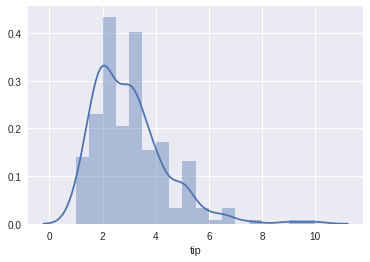

In [62]:
sns.distplot(tips.tip); #tails

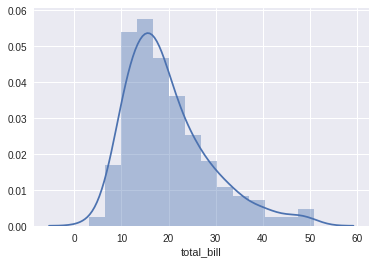

In [63]:
#dist plot of the total bill column
sns.distplot(tips['total_bill'])

In [34]:
sns.distplot(tips.percent);

AttributeError: ignored

### Make bivariate [relational plots](https://seaborn.pydata.org/generated/seaborn.relplot.html)

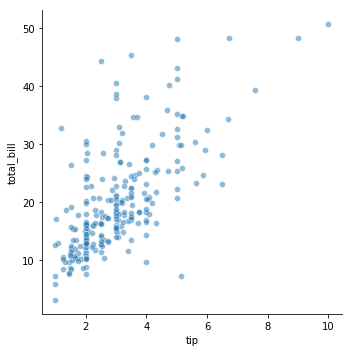

In [36]:
sns.relplot('tip', 'total_bill', data = tips, alpha =0.5); #alpha to see the pattern or transperancy

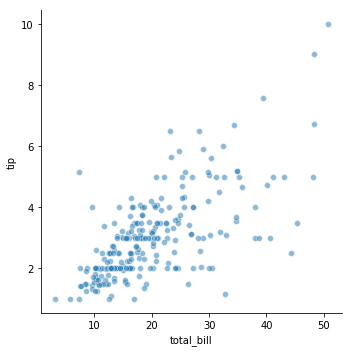

In [37]:
sns.relplot('total_bill','tip', data = tips, alpha =0.5); #alpha to see the pattern or transperancy

In [40]:
sns.relplot('total_bill', 'percent', data = tips, alpha =0.5)

ValueError: ignored

### Make univariate [categorical plots](https://seaborn.pydata.org/generated/seaborn.catplot.html)

In [41]:
#quick check of the count
tips.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

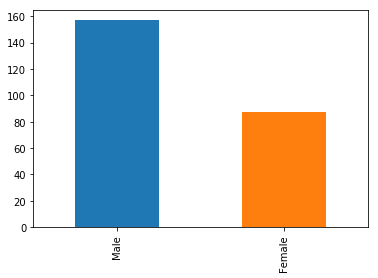

In [43]:
tips.sex.value_counts().plot.bar();

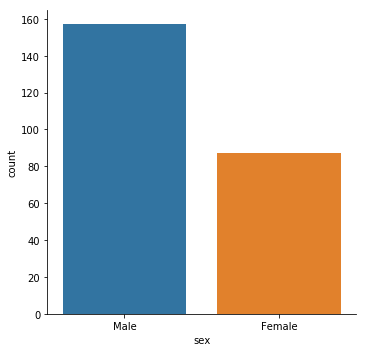

In [45]:
sns.catplot('sex', data =tips, kind = 'count');

### Make bivariate [categorical plots](https://seaborn.pydata.org/generated/seaborn.catplot.html)

box plot

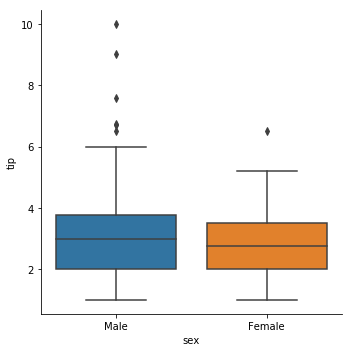

In [47]:
sns.catplot('sex', 'tip', data =tips, kind = 'box');

categorical scatter plot

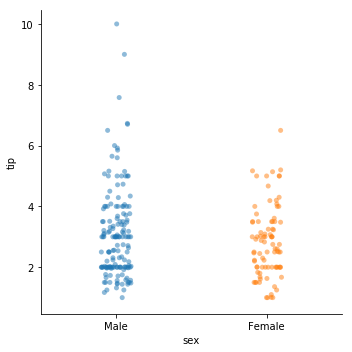

In [49]:
sns.catplot('sex', 'tip', data =tips, kind = 'strip', alpha =0.5);

swarm plot

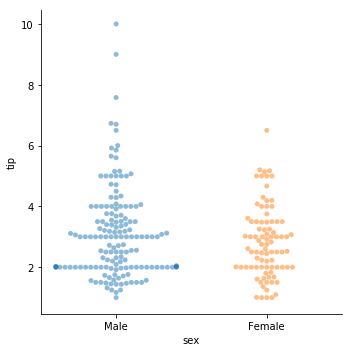

In [50]:
sns.catplot('sex', 'tip', data =tips, kind = 'swarm', alpha =0.5);

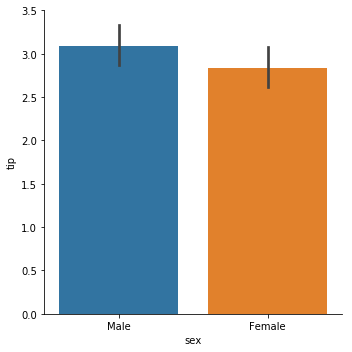

In [52]:
sns.catplot('sex', 'tip', data =tips, kind = 'bar');

In [54]:
sns.catplot('sex', 'percent', data =tips, kind = 'bar');

ValueError: ignored

## 3. Flights

### Load dataset

In [0]:
flights = sns.load_dataset('flights')

### See the data's shape

In [65]:
flights.shape

(144, 3)

### See the first 5 rows

In [66]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


### Describe the data

In [67]:
flights.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


### Plot year & passengers

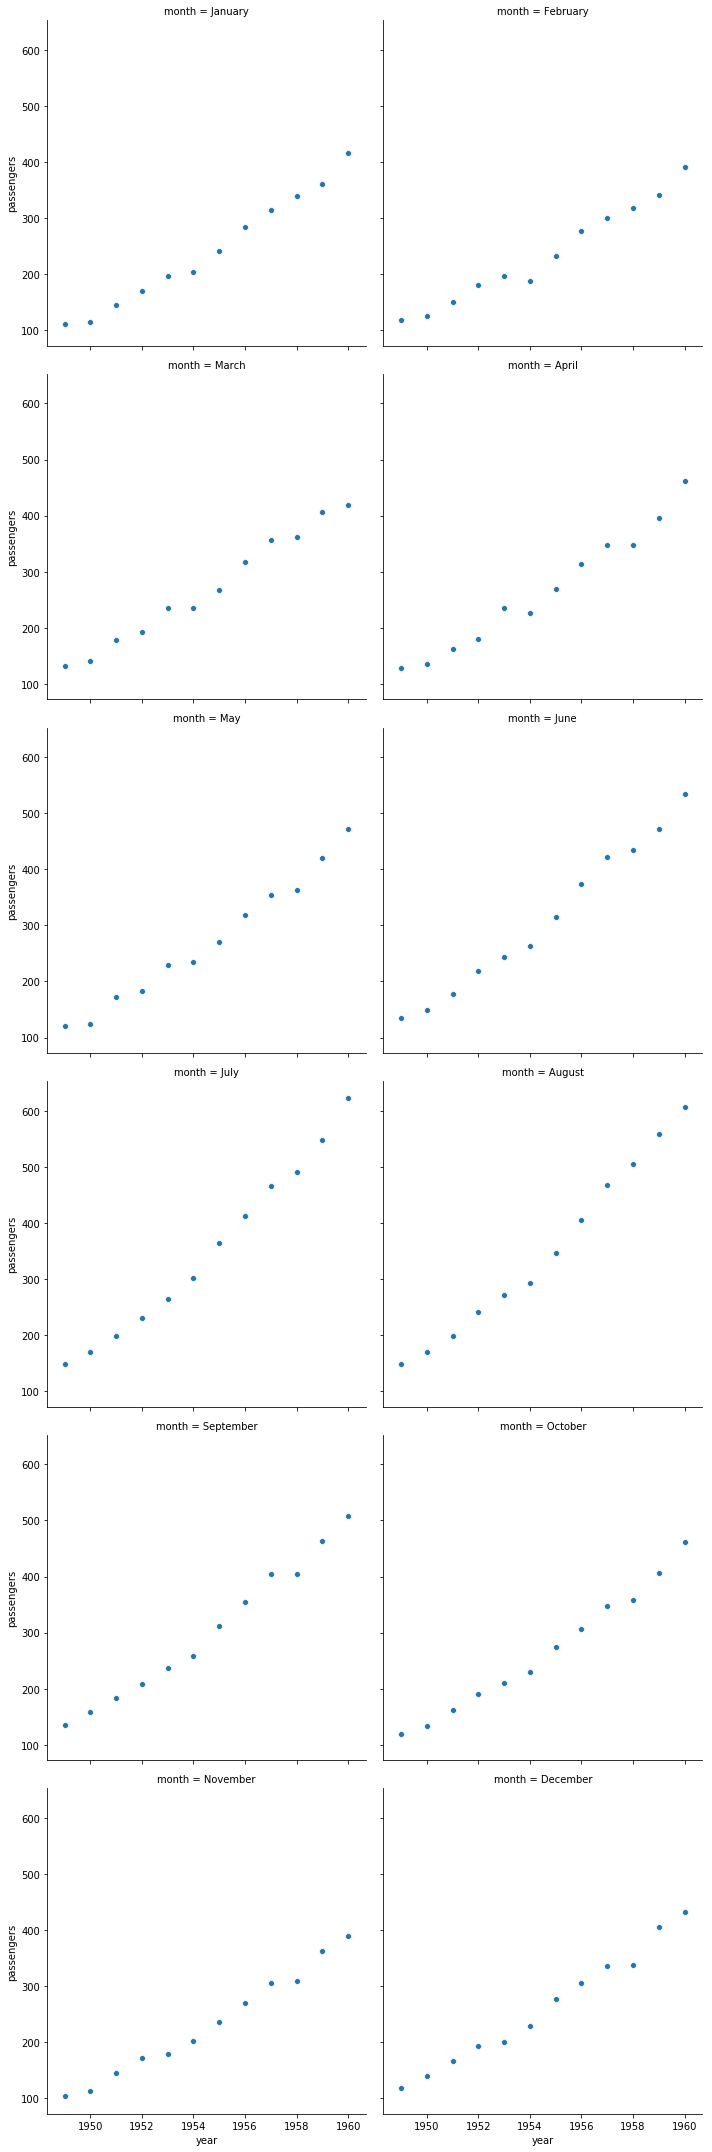

In [8]:
sns.relplot('year', 'passengers', col='month', data=flights, col_wrap=2);

### Plot month & passengers

In [70]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [2]:
import seaborn as sns
sns.__version__

'0.9.0'

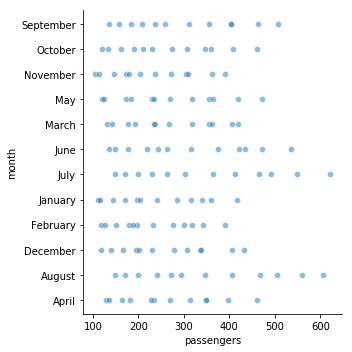

In [6]:
import seaborn as sns
sns.relplot('passengers', 'month', data=flights, alpha=0.5);

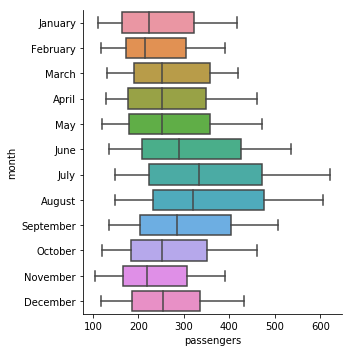

In [10]:
sns.catplot('passengers', 'month', data =flights, kind = 'box');

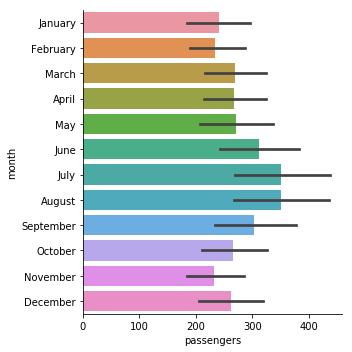

In [24]:
sns.catplot('passengers', 'month', data =flights, kind = 'bar');

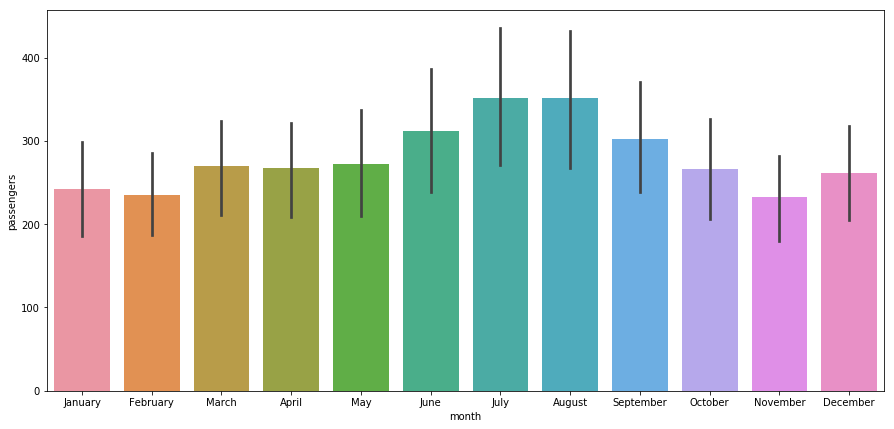

In [29]:
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches( 15, 7)
sns.barplot('month', 'passengers', data = flights)

### Create a [pivot table](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot_table.html) of passengers by month and year

In [14]:
flights.pivot_table

<bound method DataFrame.pivot_table of      year      month  passengers
0    1949    January         112
1    1949   February         118
2    1949      March         132
3    1949      April         129
4    1949        May         121
5    1949       June         135
6    1949       July         148
7    1949     August         148
8    1949  September         136
9    1949    October         119
10   1949   November         104
11   1949   December         118
12   1950    January         115
13   1950   February         126
14   1950      March         141
15   1950      April         135
16   1950        May         125
17   1950       June         149
18   1950       July         170
19   1950     August         170
20   1950  September         158
21   1950    October         133
22   1950   November         114
23   1950   December         140
24   1951    January         145
25   1951   February         150
26   1951      March         178
27   1951      April         163
28  

In [0]:
import pandas as pd
import numpy as np
table = pd.pivot_table(flights, values='passengers', index=['month'],
                   columns=['year'], aggfunc=np.sum)

In [20]:
table.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


### Plot the pivot table as a [heat map](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

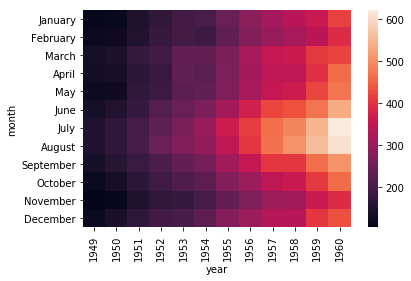

In [21]:
sns.heatmap(flights.pivot_table('passengers', 'month', 'year'))